In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [95]:
url = "https://raw.githubusercontent.com/SylviaCooperhouse/dimond-price-analysis/main/diamonds.csv"
df = pd.read_csv(url)
df.head()  # Display the first 5 rows

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [96]:
# Display basic statistics of the dataset
columns_to_describe = ['carat', 'cut','depth','table','price']
basic_stats = df[columns_to_describe].describe()
print("Basic Statistics:")
print(basic_stats)

# Count the number of unique values in each column
unique_counts = df.nunique()
print("\nNumber of Unique Values in Each Column:")
print(unique_counts)

Basic Statistics:
              carat         depth         table         price
count  53940.000000  53940.000000  53940.000000  53940.000000
mean       0.797940     61.749405     57.457184   3932.799722
std        0.474011      1.432621      2.234491   3989.439738
min        0.200000     43.000000     43.000000    326.000000
25%        0.400000     61.000000     56.000000    950.000000
50%        0.700000     61.800000     57.000000   2401.000000
75%        1.040000     62.500000     59.000000   5324.250000
max        5.010000     79.000000     95.000000  18823.000000

Number of Unique Values in Each Column:
Unnamed: 0    53940
carat           273
cut               5
color             7
clarity           8
depth           184
table           127
price         11602
x               554
y               552
z               375
dtype: int64


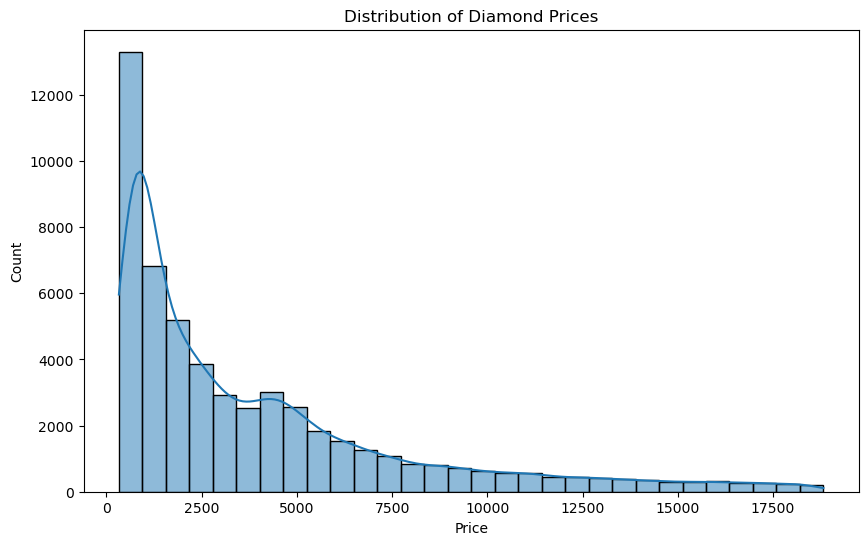

In [16]:
# Data Visualization
# Histogram of diamond prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title("Distribution of Diamond Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

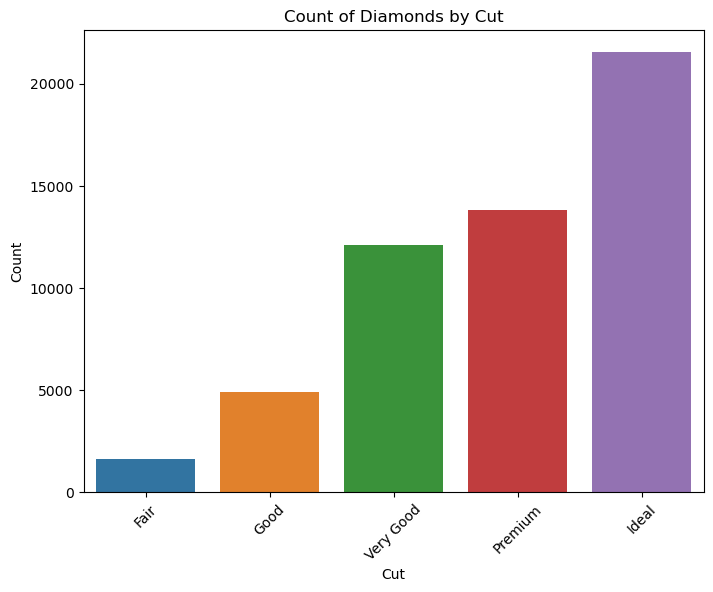

In [17]:
# Countplot of diamond cuts
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='cut', order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])
plt.title("Count of Diamonds by Cut")
plt.xlabel("Cut")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

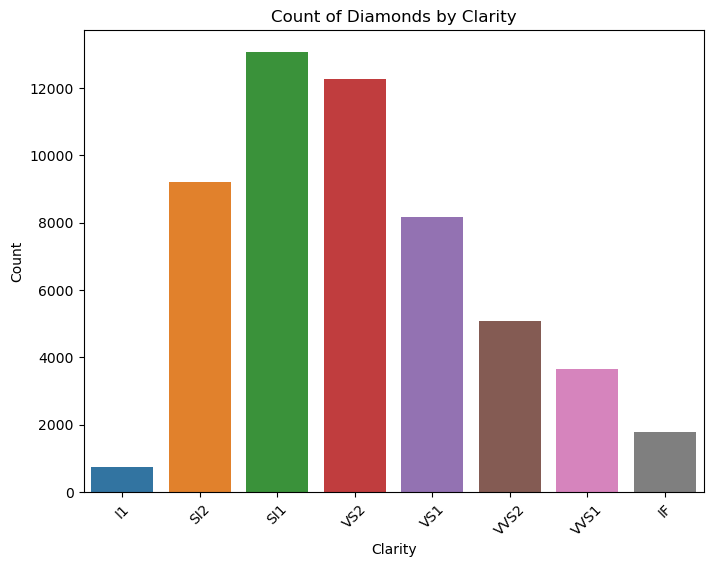

In [18]:
# Countplot of diamond clarity
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='clarity', order=['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'])
plt.title("Count of Diamonds by Clarity")
plt.xlabel("Clarity")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

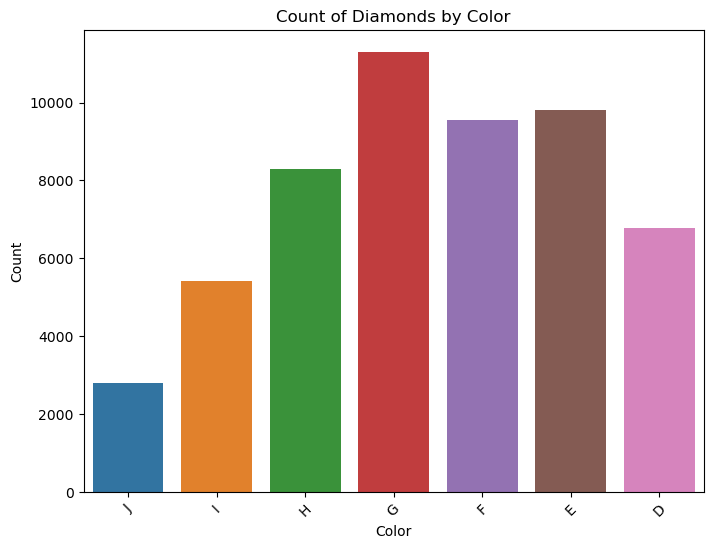

In [19]:
# Countplot of diamond color
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='color', order=['J', 'I', 'H', 'G', 'F', 'E', 'D'])
plt.title("Count of Diamonds by Color")
plt.xlabel("Color")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [92]:
unique_values = df['clarity'].unique()
# Convert the result to a list if needed
unique_values_list = unique_values.tolist()
print(unique_values_list)

['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']


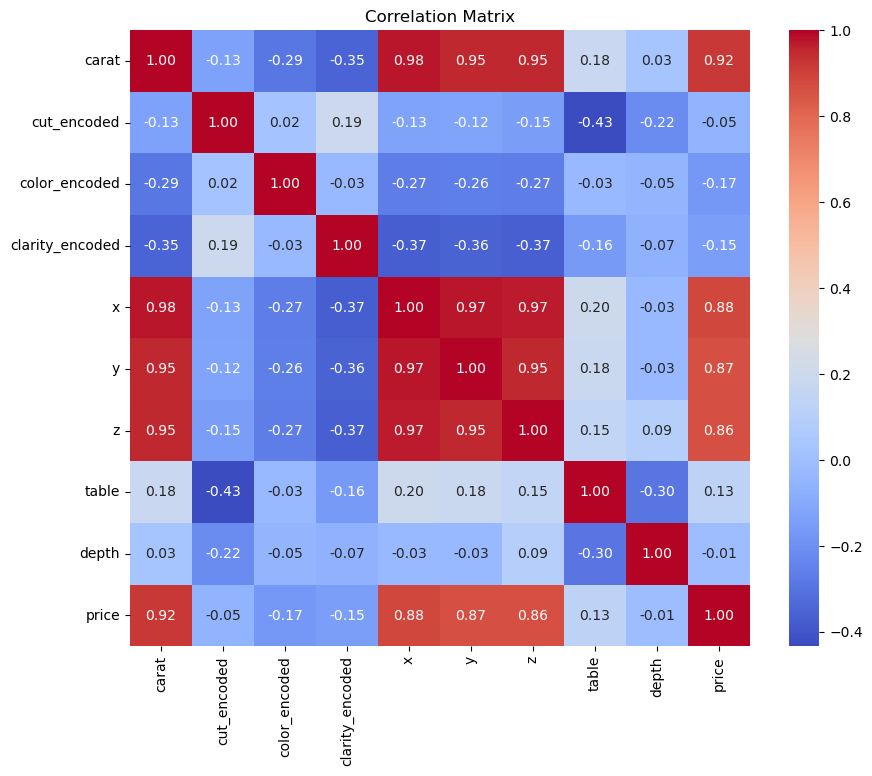

In [98]:
# Encode the 'cut' column into numerical values
cut_mapping = {
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Premium': 4,
    'Ideal': 5
}
df['cut_encoded'] = df['cut'].map(cut_mapping)

color_mapping = {
    'J': 1,
    'I': 2,
    'H': 3,
    'G': 4,
    'F': 5,
    'E': 6,
    'D': 7
}

# Apply the mapping to the 'color' column
df['color_encoded'] = df['color'].map(color_mapping)

clarity_mapping = {
    'I1': 1,
    'SI2': 2,
    'SI1': 3,
    'VS2': 4,
    'VS1': 5,
    'VVS2': 6,
    'VVS1': 7,
    'IF': 8
}

# Apply the mapping to the 'clarity' column
df['clarity_encoded'] = df['clarity'].map(clarity_mapping)
# Calculate and visualize the correlation matrix
# Select the columns you want to include in the correlation matrix
columns_to_include = ['carat','cut_encoded','color_encoded','clarity_encoded','x', 'y', 'z','table','depth','price']

# Calculate and visualize the correlation matrix
correlation_matrix = df[columns_to_include].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# If you observe high correlations between pairs of features, you may need to decide whether to keep both features, remove one of them, or explore more advanced techniques like principal component analysis (PCA) to handle multicollinearity.

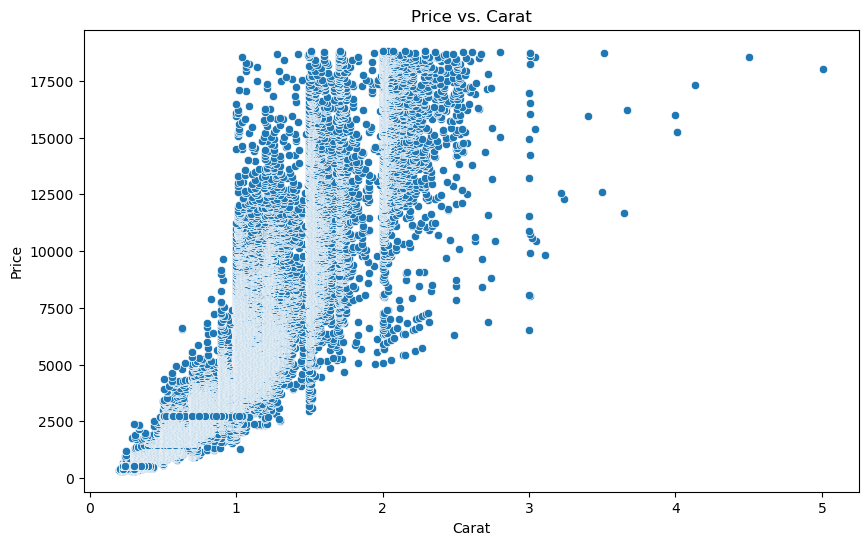

In [26]:
# Visualize the relationship between price and carat using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='carat', y='price')
plt.title("Price vs. Carat")
plt.xlabel("Carat")
plt.ylabel("Price")
plt.show()

Mean Squared Error: 2401388.654479092
R-squared: 0.8489390686155809


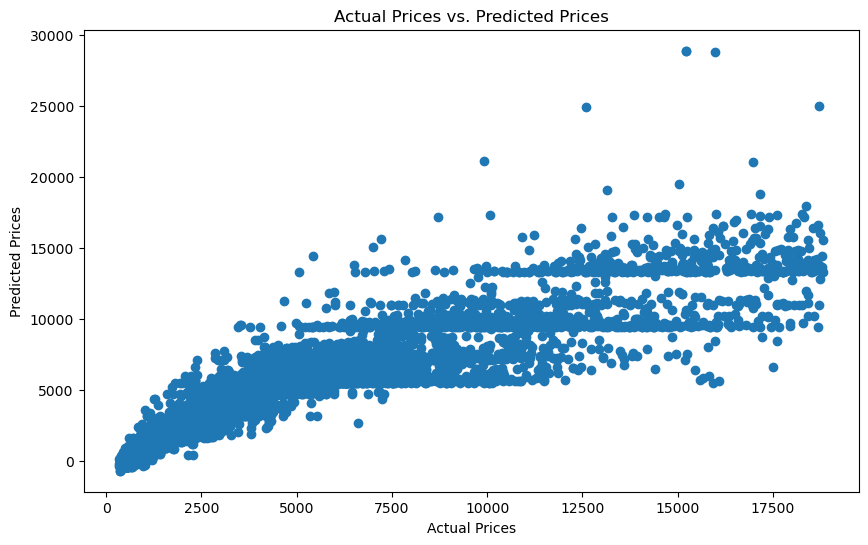

In [104]:
# Load your dataset into a DataFrame (assuming it's already loaded as 'df')

# Select features and target variable
X = df[['carat']]  # Features
y = df['price']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

<Figure size 1000x600 with 0 Axes>

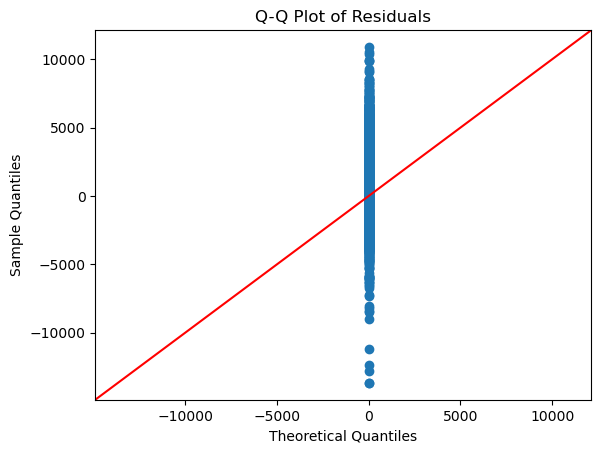

In [105]:
import statsmodels.api as sm
plt.figure(figsize=(10, 6))
sm.qqplot(y_test - y_pred, line='45')
plt.title("Q-Q Plot of Residuals")
plt.show()
# this is definitely saying the residuals are not normally distribued

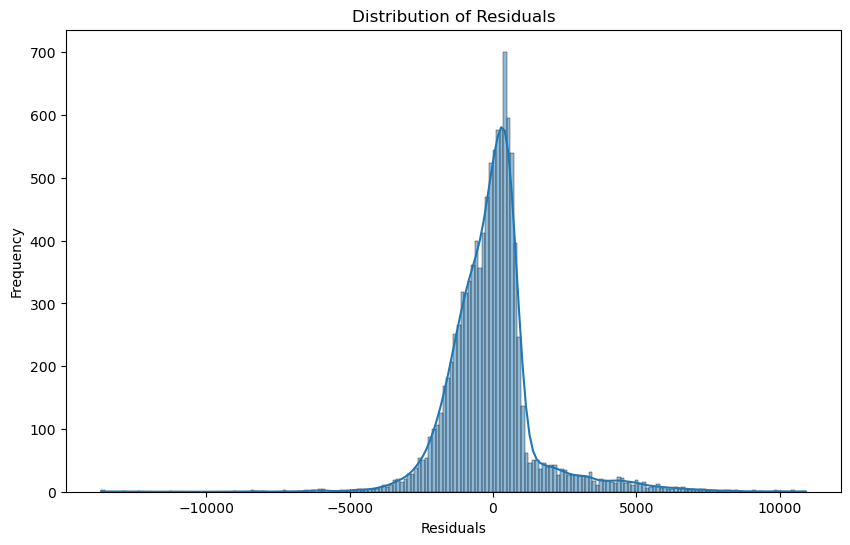

In [106]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()
# A departure from normality or systematic patterns in residuals may indicate model inadequacies.
# Right skewed - understimate some high values in the rarget variable

In [66]:
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error:", mae)
print("Median Absolute Error:", medae)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 1009.5047420600889
Median Absolute Error: 643.294937301029
Root Mean Squared Error: 1549.6414599768207


Mean Squared Error: 2376720.0151081136
R-squared: 0.8504908655862277


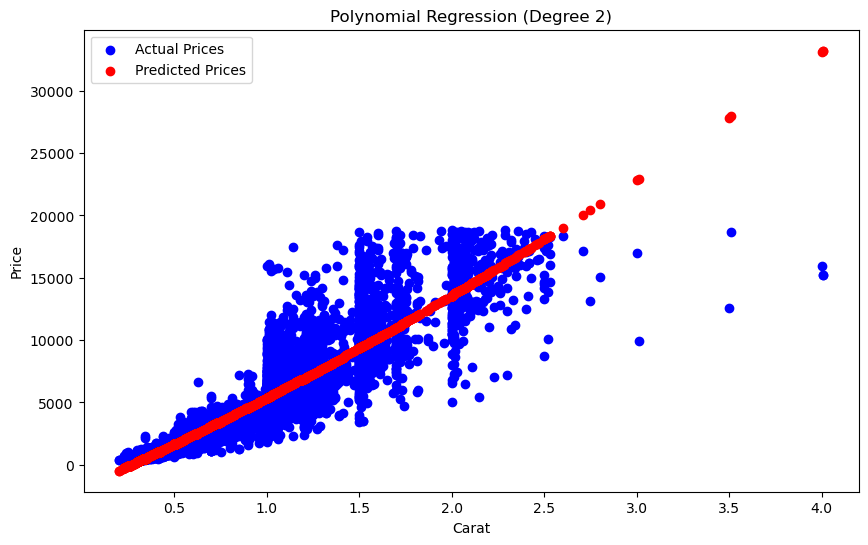

In [69]:
# Polynomial Regression
# Select features and target variable
X = df[['carat']]
y = df['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features (e.g., quadratic)
degree = 2  # You can change this to explore different polynomial degrees
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create and fit a polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Make predictions on the test data
y_pred = poly_reg.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.scatter(X_test, y_pred, color='red', label='Predicted Prices')
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title(f"Polynomial Regression (Degree {degree})")
plt.legend()
plt.show()
# not much an improvement compared to the linear regression model

Mean Squared Error: 294828.59311426064
R-squared: 0.9814536136033094


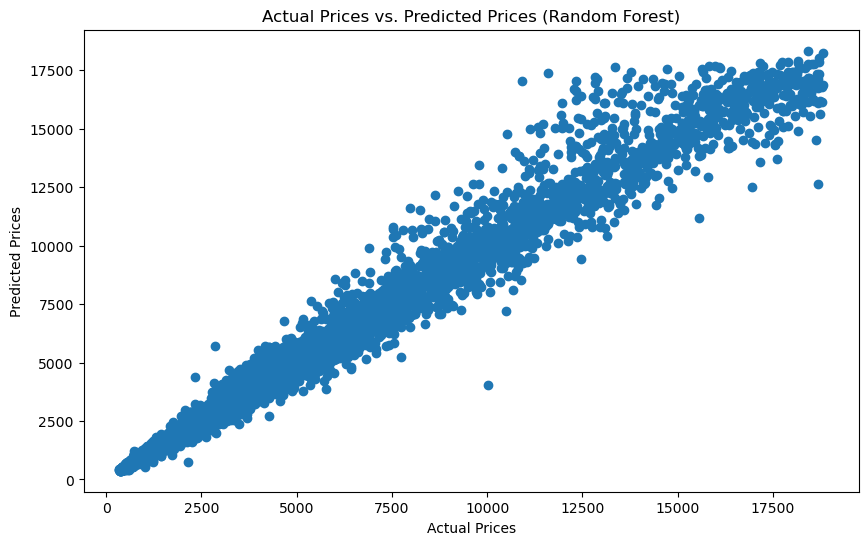

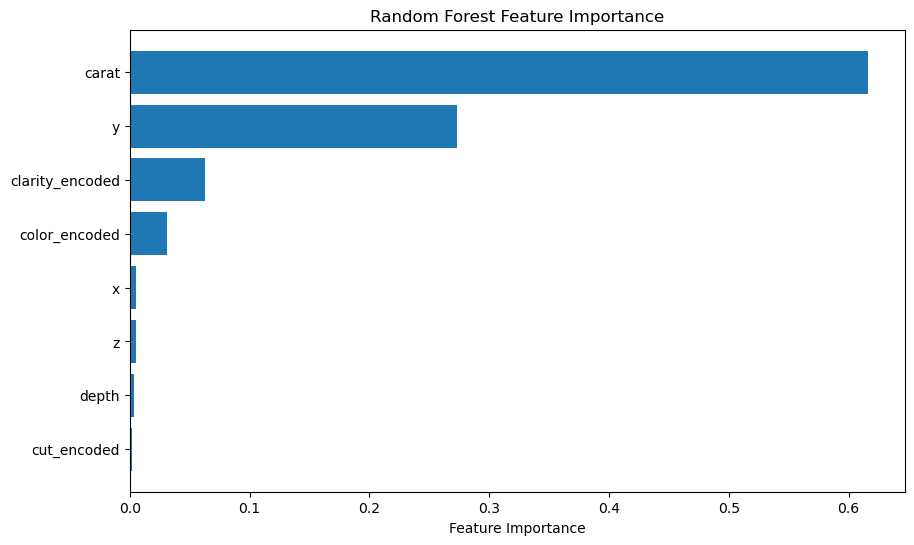

In [109]:
# Select features and target variable
X = df[['carat', 'cut_encoded', 'color_encoded', 'clarity_encoded', 'x', 'y', 'z', 'depth']]
y = df['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest regression model using common n_estimators and random_state to start with
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# The actual integer value you use for random_state doesn't matter as long as it's consistent across runs for reproducibility.

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualize the results (e.g., predicted vs. actual prices)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices (Random Forest)")
plt.show()

# Feature Importance Analysis
feature_importance = rf_model.feature_importances_
feature_names = X.columns

# Sort features by importance
sorted_idx = np.argsort(feature_importance)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

# Random Forest model explains approximately 98.14% of the variance in diamond prices.
# This suggests that the model is capturing a substantial portion of the price variability in the dataset.

In [107]:
# In case the results above are not that good, try Grid Search below
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [100, 200, 500],  # Try different values for n_estimators
    # Add other hyperparameters and their values here
}

# Create a Random Forest regressor
rf_model = RandomForestRegressor(random_state=42)

# Create a grid search object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
# In the case above, using both 100 or 500 gives about 98% R^2 value so we can stick with 100 for better speed

Best Hyperparameters: {'n_estimators': 500}
Mean Squared Error: 2050467.155714418
R-squared: 0.871014016103707


In [101]:
# Predit the value of any dimond using the model result
# Define input features for the new diamond
new_diamond = {
    'carat': 1.0,              # Example carat value
    'cut_encoded': 5,          # Example cut_encoded value (e.g., 'Ideal' mapped to 5)
    'color_encoded': 6,        # Example color_encoded value (e.g., 'E' mapped to 6)
    'clarity_encoded': 5,      # Example clarity_encoded value (e.g., 'VS1' mapped to 5)
    'x': 6.5,                  # Example x dimension in mm
    'y': 6.5,                  # Example y dimension in mm
    'z': 4.0,                  # Example z dimension in mm
    'depth': 61.5              # Example depth percentage
}

# Create a DataFrame from the input dictionary
new_data = pd.DataFrame([new_diamond])

# Use the trained model to predict the price for the new diamond
predicted_price = rf_model.predict(new_data)

print("Predicted Price:", predicted_price[0])

Predicted Price: 8370.18
